# **NATURAL DISASTER TWEETS SENTIMENT ANALYSIS**

Governments and agencies are struggling to organise efficient relief initiatives as natural catastrophes become more common, worsened by climate change. Natural language processing (NLP), machine learning (ML), and artificial intelligence (AI) can all aid. In times of crisis, Twitter has become a vital communication tool. Because smartphones are so common, users may use them to broadcast a real-time emergency. Also, Twitter has been utilised as an excellent platform for people to express their thoughts about the crisis, which can assist governing authorities comprehend the public's sentiments and take necessary action. A huge number of users uploaded information such as disaster damage reports and disaster readiness circumstances throughout the crisis response period, making Twitter a crucial social media platform for updating and accessing data. Mining emotive data effectively can help us better comprehend catastrophe response in a quick and straightforward manner.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')

# Reading The Data

In [2]:
tornado_data = pd.read_csv("../input/natural-disaster-tweets/2011Tornado_Summary.csv")
sandy_data = pd.read_csv("../input/natural-disaster-tweets/2012Sandy_Summary.csv")
floods_data = pd.read_csv("../input/natural-disaster-tweets/2013Floods_Summary.csv")
blizzard_data = pd.read_csv("../input/natural-disaster-tweets/2016Blizzard_Summary.csv")
matthew_data = pd.read_csv("../input/natural-disaster-tweets/2016Matthew_Summary.csv")
hurricane_data = pd.read_csv("../input/natural-disaster-tweets/2017Hurricane_Summary.csv")
michael_data = pd.read_csv("../input/natural-disaster-tweets/2018Michael_Summary.csv")
wildfires_data = pd.read_csv("../input/natural-disaster-tweets/2018Wildfires_Summary.csv")
dorian_data = pd.read_csv("../input/natural-disaster-tweets/2019Dorian_Summary.csv")

In [3]:
tornado_data.head()

,num,text,timestamp,label
0,0,RT @uberdogfound: Please RT - Food needed for ...,40657.975000,1
1,1,Please RT - Food needed for shelter in NC in a...,40657.975000,1
2,3,‚ô°its raining and tornado warnings....about t...,40657.897917,1
3,9,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1
4,10,Saved by the tornado warning....I'm just ready...,40657.756250,0


In [4]:
tornado_data.head()

,num,text,timestamp,label
0,0,RT @uberdogfound: Please RT - Food needed for ...,40657.975000,1
1,1,Please RT - Food needed for shelter in NC in a...,40657.975000,1
2,3,‚ô°its raining and tornado warnings....about t...,40657.897917,1
3,9,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1
4,10,Saved by the tornado warning....I'm just ready...,40657.756250,0


In [5]:
sandy_data.head()

,num,text,timestamp,label
0,23933298,They make Hurricane Sandy sound like a big dea...,41209.64722,1
1,619454798,The kitchen was out of mad food tonight so I t...,41213.17083,1
2,885698120,Hundreds if not thousands of people lost their...,41213.16736,1
3,145900244,“@_KingDing_ALing: My TL right now:\n-The Heat...,41213.15625,1
4,477093805,#YouGainMajorPointsIf you go to dollarama whil...,41213.14375,0


In [6]:
sandy_data.head()

,num,text,timestamp,label
0,23933298,They make Hurricane Sandy sound like a big dea...,41209.64722,1
1,619454798,The kitchen was out of mad food tonight so I t...,41213.17083,1
2,885698120,Hundreds if not thousands of people lost their...,41213.16736,1
3,145900244,“@_KingDing_ALing: My TL right now:\n-The Heat...,41213.15625,1
4,477093805,#YouGainMajorPointsIf you go to dollarama whil...,41213.14375,0


In [7]:
floods_data.head()

,num,text,timestamp,label
0,2,"It's Ok, Manchester's off flood alert. Fat cho...",41525.786111,0
1,3,"Love how you ask for a tiny bit of sauce, and ...",41525.773611,0
2,4,Dif tailgate!! Morning games and good food. Im...,41525.707639,0
3,8,"As much food as I've eaten today, I'm going to...",41525.697222,0
4,11,‚Äú@____Reece: Can't wait for the 'I'm hanging...,41525.411806,0


In [8]:
floods_data.head()

,num,text,timestamp,label
0,2,"It's Ok, Manchester's off flood alert. Fat cho...",41525.786111,0
1,3,"Love how you ask for a tiny bit of sauce, and ...",41525.773611,0
2,4,Dif tailgate!! Morning games and good food. Im...,41525.707639,0
3,8,"As much food as I've eaten today, I'm going to...",41525.697222,0
4,11,‚Äú@____Reece: Can't wait for the 'I'm hanging...,41525.411806,0


In [9]:
blizzard_data.head()

,num,text,timestamp,label
0,1945,& : US eastcoast had a historic blizzard.18 ...,1/25/16 15:27,1
1,1239,brixcitygurl: CAN YOU FIND THE CAR? #blizzard...,1/28/16 00:46,1
2,455,Snow blizzard in NY ! It took us a week to ge...,1/31/16 14:00,1
3,623,Snow Painting Spray bottle with a few drops ...,1/26/16 17:46,1
4,48,Stony Brook Medicine residents covering the u...,1/24/16 19:06,1


In [10]:
blizzard_data.head()

,num,text,timestamp,label
0,1945,& : US eastcoast had a historic blizzard.18 ...,1/25/16 15:27,1
1,1239,brixcitygurl: CAN YOU FIND THE CAR? #blizzard...,1/28/16 00:46,1
2,455,Snow blizzard in NY ! It took us a week to ge...,1/31/16 14:00,1
3,623,Snow Painting Spray bottle with a few drops ...,1/26/16 17:46,1
4,48,Stony Brook Medicine residents covering the u...,1/24/16 19:06,1


In [11]:
matthew_data.head()

,num,text,timestamp,label
0,2.610788e+09,"With my Love of my Life, my Bride, on the eve ...",42643.97847,0
1,1.146274e+09,Time for us to start getting ready for Hurrica...,42643.60903,0
2,1.806634e+07,Hurricane Tips #food #hurricane #matthew #remi...,42643.54861,1
3,2.610788e+09,"With my Love of my Life, my Bride, on the eve ...",42643.97847,0
4,1.146274e+09,Time for us to start getting ready for Hurrica...,42643.60903,0


In [12]:
hurricane_data.head()

,num,text,timestamp,label
0,2,Your hurricane emergency kit should include at...,42964.60069,1
1,3,"Eclipse: overrated, over-hyped, schools are be...",42964.58264,1
2,9,Your hurricane emergency kit should include at...,42964.60069,1
3,10,"Eclipse: overrated, over-hyped, schools are be...",42964.58264,1
4,14,I wanna go back to New Orleans so bad I wanna...,42961.76319,1


In [13]:
michael_data.head()

,Unnamed: 0,text,timestamp,sentiment
0,0,Keeping our eyes in Hurricane Michael as it he...,10/8/18 23:37,0
1,1,Tallahassee prepares for Hurricane Michael wit...,10/8/18 21:30,1
2,2,Just spent half a day at Costco and grocery st...,10/8/18 21:04,1
3,3,Hurricane Michael just allow us to get those f...,10/8/18 19:38,1
4,4,"If you are in Hurricane Michael's path, here i...",10/8/18 19:24,0


In [14]:
michael_data.rename(columns = {'Unnamed: 0':'num', 'sentiment':'label'}, inplace = True)
michael_data.head()

,num,text,timestamp,label
0,0,Keeping our eyes in Hurricane Michael as it he...,10/8/18 23:37,0
1,1,Tallahassee prepares for Hurricane Michael wit...,10/8/18 21:30,1
2,2,Just spent half a day at Costco and grocery st...,10/8/18 21:04,1
3,3,Hurricane Michael just allow us to get those f...,10/8/18 19:38,1
4,4,"If you are in Hurricane Michael's path, here i...",10/8/18 19:24,0


In [15]:
wildfires_data.head()

,num,text,timestamp,label
0,1831,\n\nEntertainment Tonight: Dave Grohl Deliver...,43418.55139,1
1,915,Residents are oftentimes left no choice but...,43318.62153,1
2,971,HEADLINES BLAME THIS ON ‚ÄúWILDFIRE‚Äù ‚Äî\n...,43427.82917,1
3,804,‚ÄúAlmost 200 Australian and NZ firefighters ...,43315.81181,1
4,1299,‚ÄúPolice arrest suspect for setting off mass...,43321.93889,1


In [16]:
dorian_data.head()

,num,text,timestamp,label
0,5.677583e+08,The governor of PR Wanda Vazquez just made a s...,43703.98333,1
1,5.677583e+08,The governor of PR Wanda Vazquez just made a s...,43703.98333,1
2,1.004725e+09,To my family and friends who live in the path ...,43705.96528,0
3,3.278573e+07,My colleague @LizBalmaseda with some food tips...,43705.93264,1
4,1.020000e+18,Hurricane #Dorian #Newadvisory \ntime to prepa...,43705.92292,1


# Data Visualization

Text(0, 0.5, 'samples')

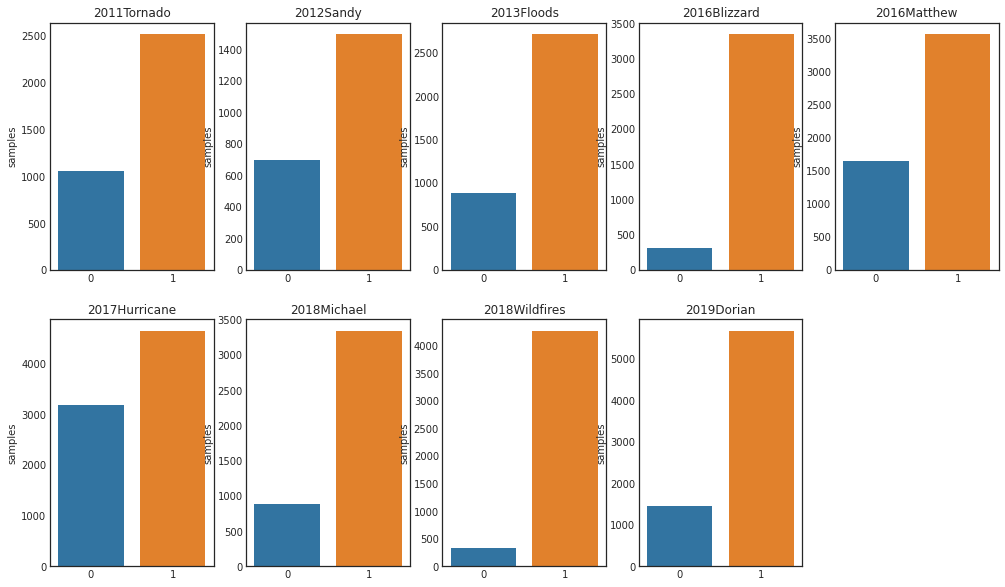

In [17]:
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(2,5,1)
ax.set_title('2011Tornado')
x = tornado_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax=plt.subplot(2,5,2)
ax.set_title('2012Sandy')
x = sandy_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax=plt.subplot(2,5,3)
ax.set_title('2013Floods')
x = floods_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax=plt.subplot(2,5,4)
ax.set_title('2016Blizzard')
x = blizzard_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax=plt.subplot(2,5,5)
ax.set_title('2016Matthew')
x = matthew_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax=plt.subplot(2,5,6)
ax.set_title('2017Hurricane')
x = hurricane_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax = plt.subplot(2,5,7)
ax.set_title('2018Michael')
x = michael_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax = plt.subplot(2,5,8)
ax.set_title('2018Wildfires')
x = wildfires_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

ax = plt.subplot(2,5,9)
ax.set_title('2019Dorian')
x = dorian_data.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

# Cleaning Data

### Dropping Duplicates

In [18]:
print("Before Dropping Duplicates")
print("Tornado: ",tornado_data.shape)
print("Sandy:",sandy_data.shape)
print("Floods:",floods_data.shape)
print("Blizzard:",blizzard_data.shape)
print("Matthew:",matthew_data.shape)
print("Hurricane:",hurricane_data.shape)
print("Michael:",michael_data.shape)
print("Wildfires:",wildfires_data.shape)
print("Dorian:",dorian_data.shape)

Before Dropping Duplicates
Tornado:  (3572, 4)
Sandy: (2190, 4)
Floods: (3597, 4)
Blizzard: (3649, 4)
Matthew: (5204, 4)
Hurricane: (7823, 4)
Michael: (4227, 4)
Wildfires: (4596, 4)
Dorian: (7140, 4)


In [19]:
tornado_data.drop_duplicates(inplace = True)
sandy_data.drop_duplicates(inplace = True)
floods_data.drop_duplicates(inplace = True)
blizzard_data.drop_duplicates(inplace = True)
matthew_data.drop_duplicates(inplace = True)
hurricane_data.drop_duplicates(inplace = True)
michael_data.drop_duplicates(inplace = True)
wildfires_data.drop_duplicates(inplace = True)
dorian_data.drop_duplicates(inplace = True)

In [20]:
print("After Dropping Duplicates")
print("Tornado: ",tornado_data.shape)
print("Sandy:",sandy_data.shape)
print("Floods:",floods_data.shape)
print("Blizzard:",blizzard_data.shape)
print("Matthew:",matthew_data.shape)
print("Hurricane:",hurricane_data.shape)
print("Michael:",michael_data.shape)
print("Wildfires:",wildfires_data.shape)
print("Dorian:",dorian_data.shape)

After Dropping Duplicates
Tornado:  (3572, 4)
Sandy: (2190, 4)
Floods: (3597, 4)
Blizzard: (3649, 4)
Matthew: (4519, 4)
Hurricane: (7823, 4)
Michael: (4227, 4)
Wildfires: (4596, 4)
Dorian: (5792, 4)


### Merging the Datasets into a single dataframe

In [21]:
df = pd.concat([tornado_data, sandy_data, floods_data, blizzard_data, matthew_data, hurricane_data, 
                michael_data, wildfires_data, dorian_data], ignore_index=True)
df

,num,text,timestamp,label
0,0.000000e+00,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1
1,1.000000e+00,Please RT - Food needed for shelter in NC in a...,40657.975,1
2,3.000000e+00,‚ô°its raining and tornado warnings....about t...,40657.897917,1
3,9.000000e+00,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1
4,1.000000e+01,Saved by the tornado warning....I'm just ready...,40657.75625,0
...,...,...,...,...
39960,1.625589e+07,Bahamians rescued victims of Hurricane Dorian ...,43712.52083,1
39961,1.990336e+07,Bahamians have rescued victims of Hurricane Do...,43712.47917,1
39962,2.377450e+09,Bahamians rescued victims of Hurricane #Dorian...,43712.45833,1
39963,1.110000e+18,Bahamians rescued victims of Hurricane Dorian ...,43712.43819,1


### Extracting only the tweets and labels

In [22]:
data = pd.DataFrame().assign(Tweets = df['text'], Labels=df['label'])
data

,Tweets,Labels
0,RT @uberdogfound: Please RT - Food needed for ...,1
1,Please RT - Food needed for shelter in NC in a...,1
2,‚ô°its raining and tornado warnings....about t...,1
3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1
4,Saved by the tornado warning....I'm just ready...,0
...,...,...
39960,Bahamians rescued victims of Hurricane Dorian ...,1
39961,Bahamians have rescued victims of Hurricane Do...,1
39962,Bahamians rescued victims of Hurricane #Dorian...,1
39963,Bahamians rescued victims of Hurricane Dorian ...,1


### Data Information

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39965 entries, 0 to 39964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  39965 non-null  object
 1   Labels  39965 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 624.6+ KB


# Data Preprocessing

In [24]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [25]:
#Remove twitter handles (@user)
data["Clean_Tweet"] = np.vectorize(remove_pattern)(data["Tweets"], "@[\w]*")

In [26]:
data.head()

,Tweets,Labels,Clean_Tweet
0,RT @uberdogfound: Please RT - Food needed for ...,1,RT : Please RT - Food needed for shelter in NC...
1,Please RT - Food needed for shelter in NC in a...,1,Please RT - Food needed for shelter in NC in a...
2,‚ô°its raining and tornado warnings....about t...,1,‚ô°its raining and tornado warnings....about t...
3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,Lmao #damn RT : If I don't get any food I hope...
4,Saved by the tornado warning....I'm just ready...,0,Saved by the tornado warning....I'm just ready...


In [27]:
#Remove special characters, numbers and punctuations
data["Clean_Tweet"] = data["Clean_Tweet"].str.replace("[^a-zA-Z#]", " ")
data.head()

,Tweets,Labels,Clean_Tweet
0,RT @uberdogfound: Please RT - Food needed for ...,1,RT Please RT Food needed for shelter in NC...
1,Please RT - Food needed for shelter in NC in a...,1,Please RT Food needed for shelter in NC in a...
2,‚ô°its raining and tornado warnings....about t...,1,its raining and tornado warnings about t...
3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,Lmao #damn RT If I don t get any food I hope...
4,Saved by the tornado warning....I'm just ready...,0,Saved by the tornado warning I m just ready...


In [28]:
#Removing short words (words with length less than 3)
data["Clean_Tweet"] = data["Clean_Tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,Tweets,Labels,Clean_Tweet
0,RT @uberdogfound: Please RT - Food needed for ...,1,Please Food needed shelter area that hard torn...
1,Please RT - Food needed for shelter in NC in a...,1,Please Food needed shelter area that hard torn...
2,‚ô°its raining and tornado warnings....about t...,1,raining tornado warnings about coma from eatin...
3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,Lmao #damn food hope tornado blow yall food ya...
4,Saved by the tornado warning....I'm just ready...,0,Saved tornado warning just ready this good food


# Tokenization

In [29]:
tokenized_tweet = data["Clean_Tweet"].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Please, Food, needed, shelter, area, that, ha...
1    [Please, Food, needed, shelter, area, that, ha...
2    [raining, tornado, warnings, about, coma, from...
3    [Lmao, #damn, food, hope, tornado, blow, yall,...
4    [Saved, tornado, warning, just, ready, this, g...
Name: Clean_Tweet, dtype: object

## Stemming

In [30]:
#Each word in the sentence gets stemmed

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [pleas, food, need, shelter, area, that, hard,...
1    [pleas, food, need, shelter, area, that, hard,...
2    [rain, tornado, warn, about, coma, from, eat, ...
3    [lmao, #damn, food, hope, tornado, blow, yall,...
4    [save, tornado, warn, just, readi, thi, good, ...
Name: Clean_Tweet, dtype: object

In [31]:
#Combine words into a single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
data["Clean_Tweet"] = tokenized_tweet
data.head()

,Tweets,Labels,Clean_Tweet
0,RT @uberdogfound: Please RT - Food needed for ...,1,pleas food need shelter area that hard tornado...
1,Please RT - Food needed for shelter in NC in a...,1,pleas food need shelter area that hard tornado...
2,‚ô°its raining and tornado warnings....about t...,1,rain tornado warn about coma from eat thi food
3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,lmao #damn food hope tornado blow yall food ya...
4,Saved by the tornado warning....I'm just ready...,0,save tornado warn just readi thi good food


# Exploratory Data Analysis

### Word Count Distribution

In [32]:
data['Labels'].value_counts() #count number of  positive and negative  tweet

1    29966
0     9999
Name: Labels, dtype: int64

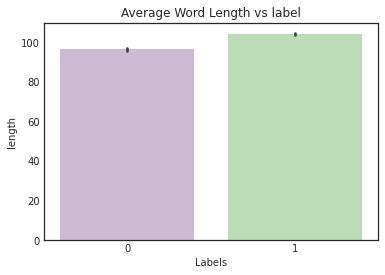

In [33]:
data['length'] = data['Clean_Tweet'].apply(len)
fig1 = sns.barplot('Labels','length',data = data,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

In [34]:
#count of words disrtibution
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
data['length'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    color = 'cyan',
    yTitle='count',
    title='Review Text Word Count Distribution')

# Word Cloud

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


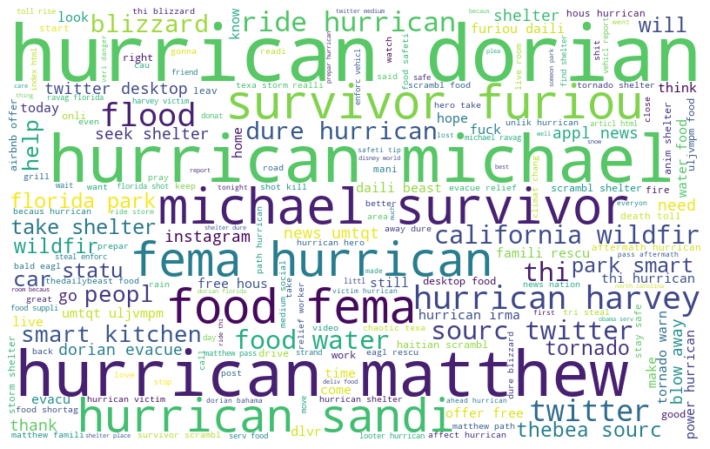

In [36]:
#Visualizing the Keywords
all_words = " ".join([sentence for sentence in data["Clean_Tweet"]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

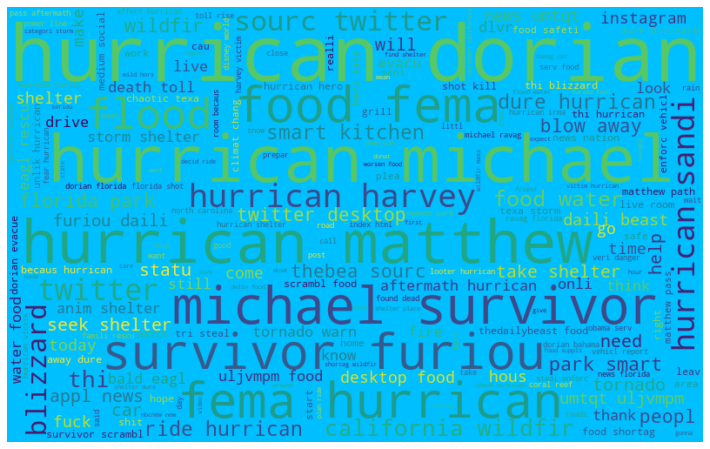

In [37]:
#Frequent words visualization for negative label
all_words = " ".join([sentence for sentence in data["Clean_Tweet"][data["Labels"]==1]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='deepskyblue', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

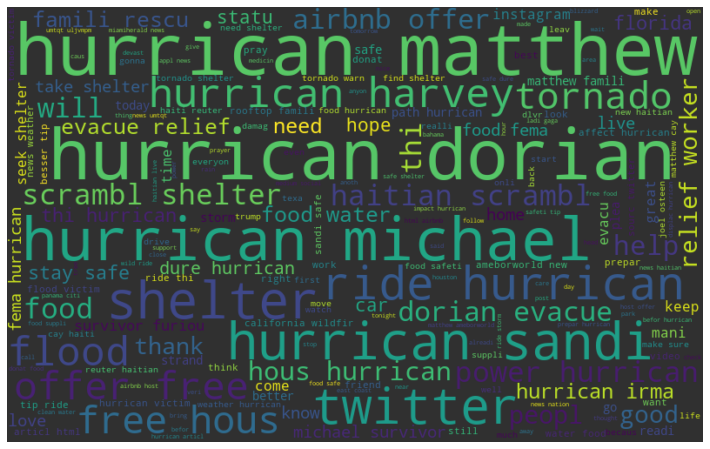

In [38]:
#Frequent words visualization for positive label
all_words = " ".join([sentence for sentence in data["Clean_Tweet"][data["Labels"]==0]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color = '#303030', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [39]:
#Extracting the hashtag
def hashtag_extract(tweets):
    hashtags = []
    #Loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [40]:
#Extract hastags from positive labelled tweets
ht_positive = hashtag_extract(data["Clean_Tweet"][data["Labels"]==0])

#Extract hastags from negative labelled tweets
ht_negative = hashtag_extract(data["Clean_Tweet"][data["Labels"]==1])

In [41]:
ht_positive[:15]

[[], [], [], [], [], [], [], [], [], [], [], [], [], ['tornado'], ['ilm']]

In [42]:
ht_negative[:15]

[[],
 [],
 [],
 ['damn', 'soidc'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['diet',
  'workout',
  'sugar',
  'obes',
  'fit',
  'fit',
  'carb',
  'food',
  'nutrit',
  'health']]

In [43]:
#Merging into a single list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [44]:
ht_positive[:15]

['tornado',
 'ilm',
 'swagg',
 'thistornadoisafreakinghuged',
 'win',
 'yummi',
 'food',
 'free',
 'coupon',
 'gso',
 'loyal',
 'loyal',
 'tornado',
 'success',
 'salarmi']

In [45]:
ht_negative[:15]

['damn',
 'soidc',
 'diet',
 'workout',
 'sugar',
 'obes',
 'fit',
 'fit',
 'carb',
 'food',
 'nutrit',
 'health',
 'iff',
 'food',
 'tornado']

# Processing the Tweets

In [46]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({"Hashtag": list(freq.keys()),
                 "Count": list(freq.values())})

d.head()

,Hashtag,Count
0,tornado,60
1,ilm,2
2,swagg,1
3,thistornadoisafreakinghuged,1
4,win,6


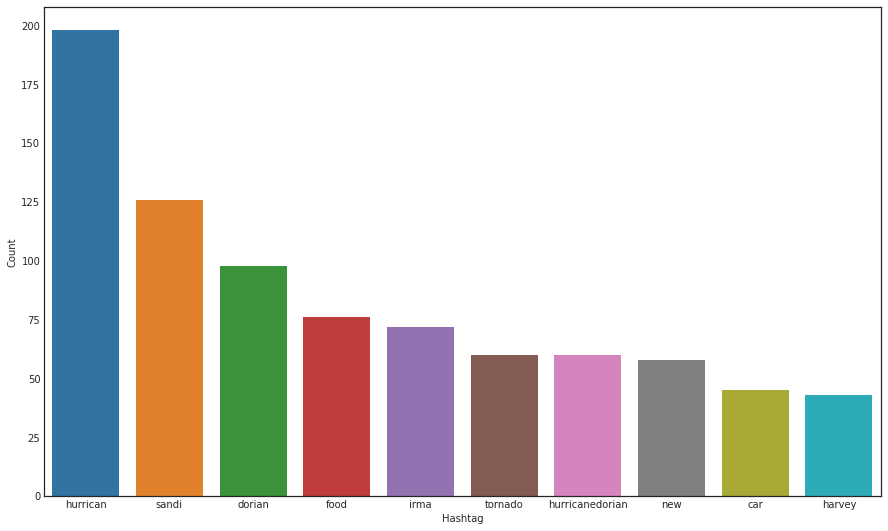

In [47]:
#Select the top 10 Hashtags
d = d.nlargest(columns = "Count", n=10)
plt.figure(figsize=(15,9))
sns.barplot(data = d, x = "Hashtag", y = "Count")
plt.show()

In [48]:
freq = nltk.FreqDist(ht_negative)
dn = pd.DataFrame({"Hashtag": list(freq.keys()),
                 "Count": list(freq.values())})

dn.head()

,Hashtag,Count
0,damn,1
1,soidc,1
2,diet,6
3,workout,2
4,sugar,1


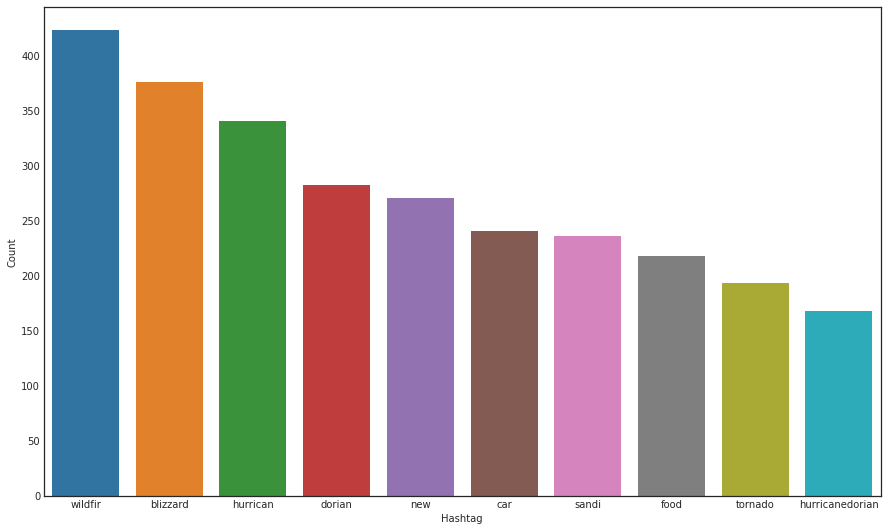

In [49]:
#Select the top 10 Hashtags
dn = dn.nlargest(columns = "Count", n=10)
plt.figure(figsize=(15,9))
sns.barplot(data = dn, x = "Hashtag", y = "Count")
plt.show()

# Vectorization

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = "english")
bow = bow_vectorizer.fit_transform(data["Clean_Tweet"])

In [51]:
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table.Clean_Tweet)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [52]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(15,8))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("hls"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

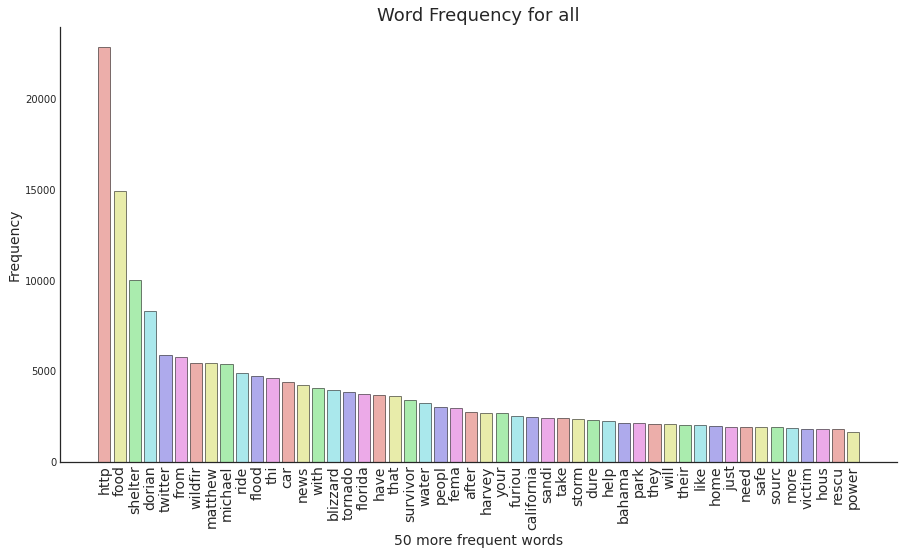

In [53]:
word_frequency = vectorization(data).sort_values(0, ascending = False)
#word_frequency_pos = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)
#word_frequency_neg = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)

    #Graph with frequency words all, positive and negative tweets and get the frequency
graph(word_frequency, 'all')
#graph(word_frequency_pos, 'positive')
#graph(word_frequency_neg, 'negative')

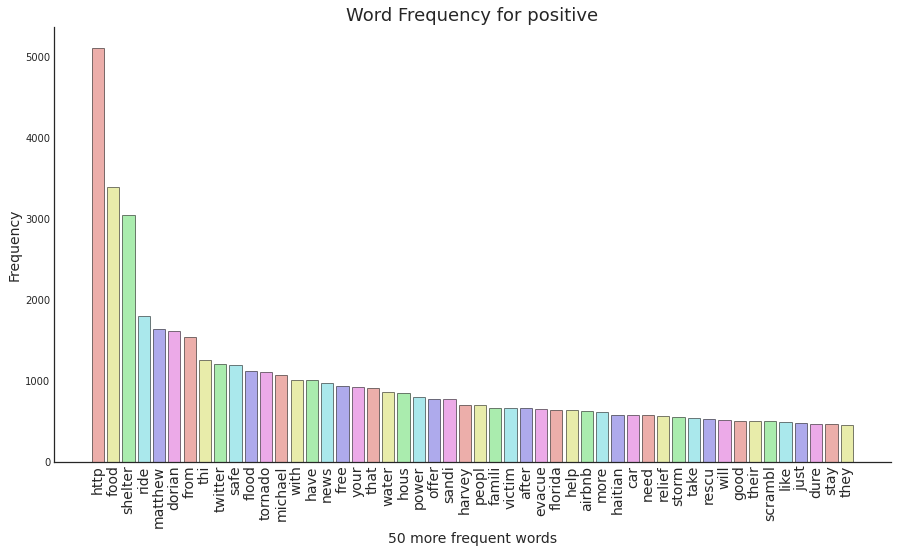

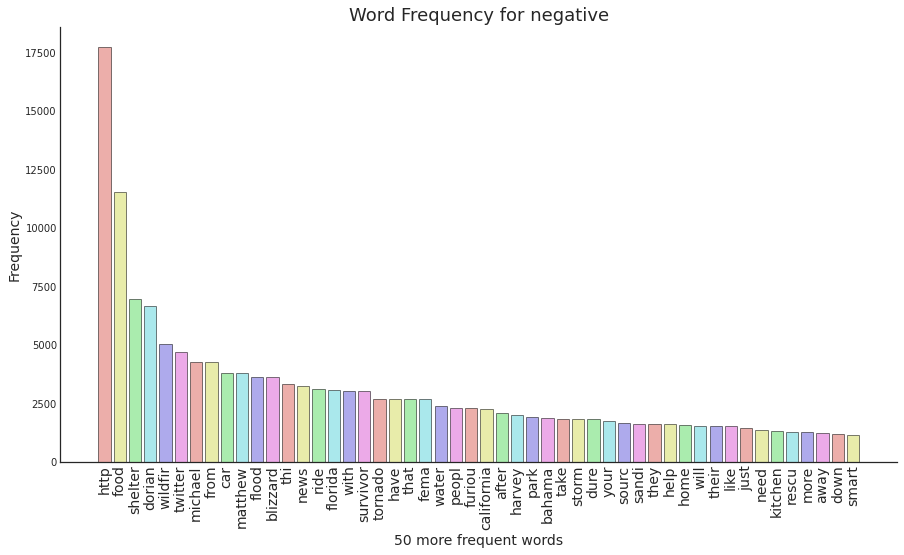

In [54]:
word_frequency_pos = vectorization(data[data['Labels'] == 0]).sort_values(0, ascending = False)
word_frequency_neg = vectorization(data[data['Labels'] == 1]).sort_values(0, ascending = False)

graph(word_frequency_pos, 'positive')
graph(word_frequency_neg, 'negative')

# Binary Classification

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [56]:
accuracy_list = []
f1_list = []
roc_auc_list = []

### Train Test Evaluation Function

In [57]:
def result(model):
    
    #fit on data
    model.fit(x_train, y_train)
    
    #prediction
    pred = model.predict(x_test)
    
    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()
    
    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [58]:
#Train Test split
x_train, x_test, y_train, y_test = train_test_split(bow, df["label"], random_state = 42, test_size = 0.25)

#### Logistic Regression

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.54      0.62      2472
           1       0.86      0.93      0.89      7520

    accuracy                           0.83      9992
   macro avg       0.79      0.74      0.76      9992
weighted avg       0.83      0.83      0.83      9992

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8339671737389912
----------------------------------------------------------------------------------------------------

F1 Score:  0.8939326130042836
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8939326130042836
----------------------------------------------------------------------------------------------------



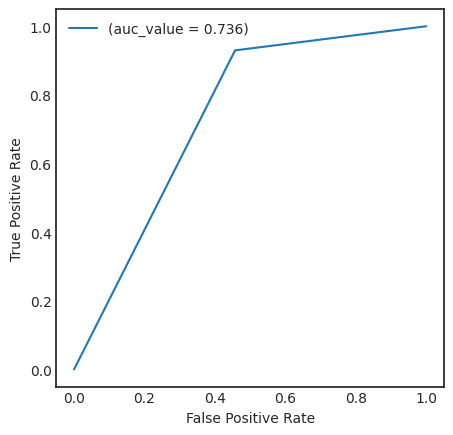


Confusion Matrix: 


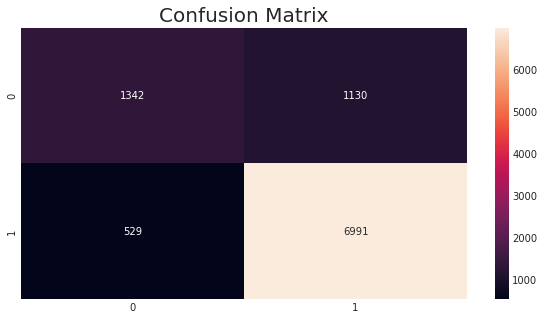

In [59]:
lr = LogisticRegression()
result(lr)

#### Random Forest Classifier

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.63      0.71      2472
           1       0.89      0.95      0.92      7520

    accuracy                           0.87      9992
   macro avg       0.85      0.79      0.81      9992
weighted avg       0.87      0.87      0.87      9992

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8714971977582066
----------------------------------------------------------------------------------------------------

F1 Score:  0.9175125273030965
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9175125273030965
----------------------------------------------------------------------------------------------------



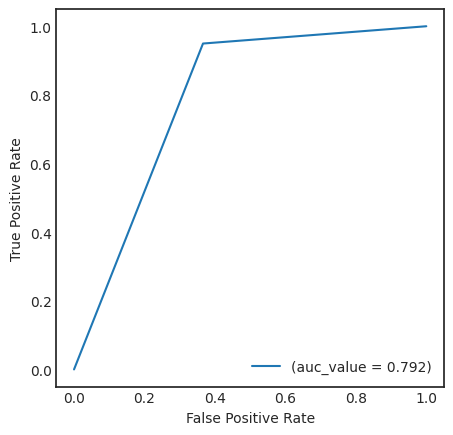


Confusion Matrix: 


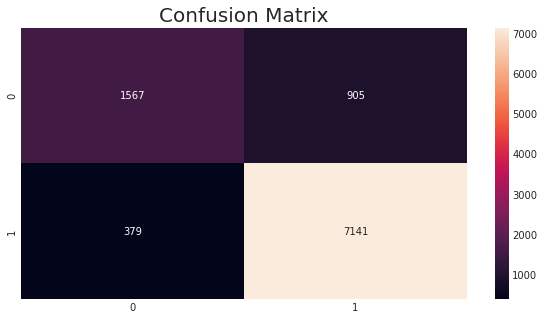

In [60]:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
result(rf)

#### KNN Classifier

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.53      0.58      2472
           1       0.85      0.91      0.88      7520

    accuracy                           0.81      9992
   macro avg       0.75      0.72      0.73      9992
weighted avg       0.80      0.81      0.80      9992

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8117493995196157
----------------------------------------------------------------------------------------------------

F1 Score:  0.878652990129669
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.878652990129669
----------------------------------------------------------------------------------------------------



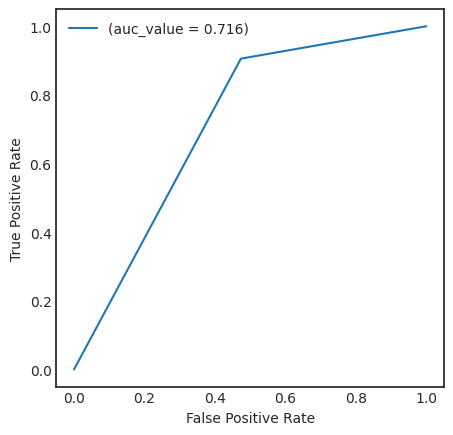


Confusion Matrix: 


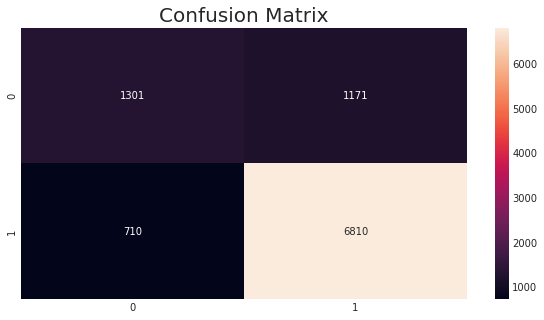

In [61]:
knn = KNeighborsClassifier()
result(knn)

#### Decision Tree Classifier

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      2472
           1       0.90      0.88      0.89      7520

    accuracy                           0.84      9992
   macro avg       0.78      0.79      0.78      9992
weighted avg       0.84      0.84      0.84      9992

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8356685348278623
----------------------------------------------------------------------------------------------------

F1 Score:  0.889709833422891
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.889709833422891
----------------------------------------------------------------------------------------------------



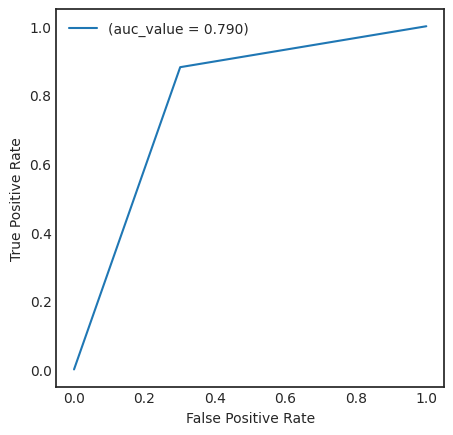


Confusion Matrix: 


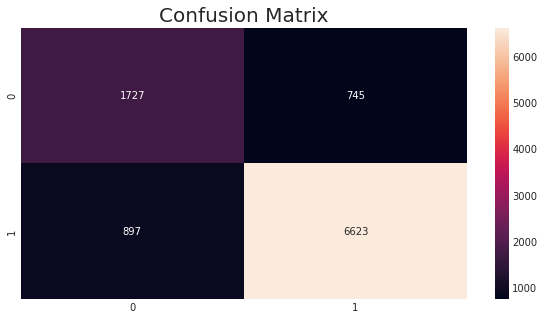

In [62]:
dt = DecisionTreeClassifier()
result(dt)

### Classifier Comparison

In [63]:
classifier_list = ["Logistic Regression", "Random Forest", "KNN", "Decision Tree"]
list_class = []
for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], accuracy_list[i], f1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

[['Logistic Regression',
  0.8339671737389912,
  0.8939326130042836,
  0.7362672571094127],
 ['Random Forest', 0.8714971977582066, 0.9175125273030965, 0.7917503701025959],
 ['KNN', 0.8117493995196157, 0.878652990129669, 0.7159398023824279],
 ['Decision Tree', 0.8356685348278623, 0.889709833422891, 0.7896713402878193]]

In [64]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "F1 Score")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
1,Random Forest,0.871497,0.917513,0.791750
0,Logistic Regression,0.833967,0.893933,0.736267
3,Decision Tree,0.835669,0.889710,0.789671
2,KNN,0.811749,0.878653,0.715940


-> Random Forest Classifier gives the best result with the highest values for the F1 Score

# Predictions from Test Dataset

In [65]:
pred_data = pd.read_csv("../input/glaucoma-test-dataset/glaucoma.csv")
pred_data.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [66]:
#Cleaning the prediction data
pred_data.shape

(650, 5)

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [68]:
#Set - Label Encoding
print(pred_data['Eye'].unique())
pred_data['Eye']= label_encoder.fit_transform(pred_data['Eye'])
print(pred_data['Eye'].unique())

['OD' 'OS']
[0 1]


In [69]:
print(pred_data['Set'].unique())
pred_data['Set']= label_encoder.fit_transform(pred_data['Set'])
print(pred_data['Set'].unique())

['A' 'B']
[0 1]


In [70]:
X = pred_data.drop(['Glaucoma','Filename'],axis=1)
y = pred_data['Glaucoma']

Since we got the best classification result for Random Forest Classifier, we use this classifier.

In [71]:
#Train Test split
px_train, px_test, py_train, py_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [72]:
rf.fit(px_train, py_train)
py_pred = rf.predict(X)

In [73]:
py_pred = np.array(py_pred)
py_pred = pd.DataFrame(py_pred)

In [74]:
f1_score(y, py_pred)

0.8622754491017964

In [75]:
py_pred.shape

(650, 1)

# Creating the output Submission file

In [76]:
test_data = pd.read_csv("../input/glaucoma-test-dataset/glaucoma.csv")
test_data.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [77]:
Filename_value = np.array(test_data['Filename'])
Filename_value = pd.DataFrame(Filename_value)
Filename_value.shape

(650, 1)

In [78]:
Set_value = np.array(test_data['Set'])
Set_value = pd.DataFrame(Set_value)
Set_value.shape

(650, 1)

In [79]:
final_result = pd.concat([Filename_value, Set_value, py_pred], join='outer', axis=1)
final_result.columns = ["Filename", "Set", "Glaucoma Positive"]
final_result

,Filename,Set,Glaucoma Positive
0,001.jpg,A,0
1,002.jpg,A,0
2,003.jpg,A,0
3,004.jpg,A,0
4,005.jpg,A,0
...,...,...,...
645,646.jpg,A,1
646,647.jpg,A,1
647,648.jpg,A,1
648,649.jpg,B,0


In [80]:
final_result["Glaucoma Positive"].value_counts()

0    484
1    166
Name: Glaucoma Positive, dtype: int64

In [81]:
final_result.to_csv("Submission_File.csv", index=False)